# Pandas/Sklearn Lab

Read in the `data/Sacramentorealestatetransactions.csv` file

In [1]:
import pandas as pd
house =pd.read_csv('../data/Sacramentorealestatetransactions.csv')
house

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
...,...,...,...,...,...,...,...,...,...,...,...,...
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424


Encode the 'city' and 'type' fields with one-hot encoding with `pd.get_dummies()`

In [18]:
get_dummies_both = pd.get_dummies(house, columns=['city', 'type']) #can also do zipcode
get_dummies_both.tail()  #...

,street,zip,state,beds,baths,sq__ft,sale_date,price,latitude,longitude,...,city_SACRAMENTO,city_SHINGLE SPRINGS,city_SLOUGHHOUSE,city_WALNUT GROVE,city_WEST SACRAMENTO,city_WILTON,type_Condo,type_Multi-Family,type_Residential,type_Unkown
980,9169 GARLINGTON CT,95829,CA,4,3,2280,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620,...,1,0,0,0,0,0,0,0,1,0
981,6932 RUSKUT WAY,95823,CA,3,2,1477,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890,...,1,0,0,0,0,0,0,0,1,0
982,7933 DAFFODIL WAY,95610,CA,3,2,1216,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803,...,0,0,0,0,0,0,0,0,1,0
983,8304 RED FOX WAY,95758,CA,4,2,1685,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424,...,0,0,0,0,0,0,0,0,1,0
984,3882 YELLOWSTONE LN,95762,CA,3,2,1362,Thu May 15 00:00:00 EDT 2008,235738,38.655245,-121.075915,...,0,0,0,0,0,0,0,0,1,0


In [3]:
one_hot_city = pd.get_dummies(house['city'])
one_hot_city.head()
one_hot_type = pd.get_dummies(house['type'])
one_hot_type.head()

,Condo,Multi-Family,Residential,Unkown
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


Encode 'city' and 'type' with `sklearn.preprocessing.OneHotEncoder`

In [7]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
both = house[['city','type']]
enc.fit(both)
encodings = enc.transform(house[['city','type']])
encodings

<985x43 sparse matrix of type '<class 'numpy.float64'>'
	with 1970 stored elements in Compressed Sparse Row format>

In [8]:
encodings.todense() #tosparse()

matrix([[0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        ...,
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.]])

Read in the `data/sfcrime-hackathon/hackathon-train.csv` file

In [15]:
crime = pd.read_csv('../data/sfcrime-hackathon/hackathon_train.csv')
crime

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2011-12-04 18:15:00,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,Sunday,PARK,NONE,100 Block of BEULAH ST,-122.452331,37.767356
1,2009-01-11 19:57:00,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,Sunday,MISSION,"ARREST, BOOKED",18TH ST / CAPP ST,-122.418272,37.761903
2,2007-01-25 18:15:00,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Thursday,CENTRAL,NONE,1200 Block of STOCKTON ST,-122.408521,37.797492
3,2012-01-10 08:55:00,ROBBERY,"ROBBERY, BODILY FORCE",Tuesday,NORTHERN,NONE,HAYES ST / FRANKLIN ST,-122.421333,37.777090
4,2014-05-27 12:25:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Tuesday,TENDERLOIN,NONE,JONES ST / TURK ST,-122.412414,37.783004
...,...,...,...,...,...,...,...,...,...
658531,2008-11-12 16:30:00,MISSING PERSON,FOUND PERSON,Wednesday,NORTHERN,NONE,2400 Block of JACKSON ST,-122.435385,37.792311
658532,2012-10-31 22:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,SOUTHERN,NONE,FOLSOM ST / 4TH ST,-122.401162,37.782024
658533,2015-05-12 15:25:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,CENTRAL,NONE,400 Block of STOCKTON ST,-122.406978,37.789918
658534,2015-04-14 00:20:00,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,Tuesday,INGLESIDE,"ARREST, BOOKED",4500 Block of MISSION ST,-122.434156,37.725426


Encode the `Category` column using a LabelEncoder(**output that we want to predict**) and the `DayOfWeek` and `PdDistrict` columns using a OneHotEncoder(**metrics, if using labelencoder will mess up with machine learning**)

In [14]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
label_enc.fit(crime['Category'])
enc.fit(crime[['DayOfWeek','PdDistrict']])
crime_encodings = enc.transform(crime[['DayOfWeek','PdDistrict']])
crime_encodings
crime_encodings.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]])

Using the data/Sacramentorealestatetransactions.csv file: 

Use a `plt.hexbin` to show the latitude/longitude distribution of sales (set gridsize=20)

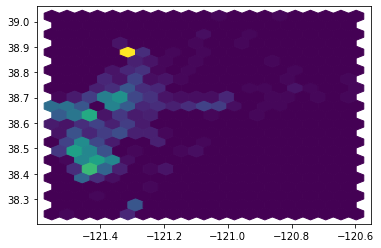

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hexbin(house['longitude'], house['latitude'], gridsize=20)
plt.show()

Use a PCA decomposition on the latitude, longitude coordinates in the dataset. Show the transformed latitude and longitude on a hexbin chart.

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = house[['longitude', 'latitude']]

X.head()

enc = StandardScaler()
pca = PCA()
Xtrans = enc.fit_transform(X)
Xtrans_pca = pca.fit_transform(Xtrans)

print(Xtrans_pca[0])

[-0.28602719 -0.52128588]


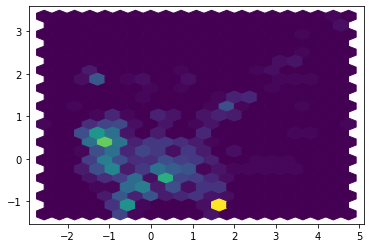

In [23]:
# Numpy array access here, [:, 0] means "all elements in the 0th column"
plt.hexbin(Xtrans_pca[:, 0], Xtrans_pca[:, 1], gridsize=20)
plt.show()